In [3]:
pip install pandas numpy scikit-learn nltk spacy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


punkt -> tokens & stopwords -> remove commom words

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/adeesha-
[nltk_data]     waheed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/adeesha-
[nltk_data]     waheed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/adeesha-
[nltk_data]     waheed/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [6]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 10.5 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [7]:
pd.set_option('display.max_colwidth',None)

try:
    df = pd.read_csv('dataset.csv')
except FileNotFoundError:
    print("File not found. Please check the file path.")
    exit()

print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [8]:
print("\nDataset Information")
df.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [9]:
print("\nSentiment Distribution")
print(df['sentiment'].value_counts()) 


Sentiment Distribution
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [10]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [13]:
def preprocess_text(text):
    """
    Cleans and preprocesses a single text string.
    1. Removes HTML tags
    2. Lowercases text
    3. Removes punctuation and numbers
    4. Tokenizes text
    5. Removes stop words
    6. Lemmatizes words
    """
    text = re.sub(r'<.*?>', '', text)
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization is often better than stemming
    text = ' '.join(tokens)
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    
    return ' '.join(lemmatized_tokens)

In [14]:
print("Preprocessing all 50,000 reviews...")
df = df.sample(500).copy()
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("Preprocessing complete.")

print("\nComparing Original vs. Cleaned_review:")
display(df[['review', 'cleaned_review']].head())

Preprocessing all 50,000 reviews...
Preprocessing complete.

Comparing Original vs. Cleaned_review:


,review,cleaned_review
46675,"Irrespective of the accuracy of facts, Bandit Queen is a true story, its true because the themes it deals with hold as much truth today as they did way back in 1994. This movie is violent, powerful and thought provoking.The protagonist is a woman of flesh and blood, whose adversity brought out the best(or worst) out of her. Keeping the subjectivity aside, there is no doubt that Phoolan's character from a young girl of 8, who is married off by her father to clear a debt(pun intended), to a gang leader who goes on to become a leader of the lower caste, has evolved into a champion in her own right. Her portrayal is so powerful that the viewer is even willing to forgive her for a massacre.<br /><br />I can understand if the western audience is not able to appreciate this masterpiece, Bandit Queen needs to be 'studied' in the Indian context, and not just checked out in stereotypes. I may not be able to sell it on its universal appeal but its certainly a must watch for the Indian audience, its a shame that the movie had a delayed, overtly censored release in India.<br /><br />Bandit Queen is the story of a woman who fought against two odds in India, being a woman and that too a lower caste, her rebellious nature and inability to just give in caused her the most horrible experiences in life, which only went on to strengthen her into a self proclaimed goddess. She responded to violence with violence and dint become the submissive woman society wanted her to be. Call it divine justice or judiciary failure, had she killed a single person she would have been hanged, she killed 24 and got revered, respected and glorified.<br /><br />P.S # Whoever found her character ""psychotic"", needs to be sodomized at 8, gangraped by 10 men at a go and paraded naked. Then they should be asked- How normal do they feel?",irrespective accuracy fact bandit queen true story true theme deal hold much truth today way back movie violent powerful thought provokingthe protagonist woman flesh blood whose adversity bring bestor bad keep subjectivity aside doubt phoolans character young girl marry father clear debtpun intended gang leader go become leader low caste evolve champion right portrayal powerful viewer even willing forgive massacrei understand western audience able appreciate masterpiece bandit queen need study indian context check stereotype may able sell universal appeal certainly must watch indian audience shame movie delay overtly censor release indiabandit queen story woman fight two odd india woman low caste rebellious nature inability give cause horrible experience life go strengthen self proclaim goddess respond violence violence dint become submissive woman society want call divine justice judiciary failure kill single person would hang kill get revere respected glorifiedps whoever find character psychotic need sodomize gangraped man go parade naked ask normal feel
117,"Usually I'm a bit of a fan of the bad eighties & early nineties film featuring now has beens...but this film is so incredibly terrible that it was a real endurance test to sit through. Guys dressing up as girls has been done to death - but never so pathetically. Corey Haim's performance was abysmal as usual, Nicole Eggert was not much better. This has no redeeming qualities, even if you are a number #1 fan of an actor/actress in this piece of trash - stay away!",usually I m bit fan bad eighty early ninety film feature beensbut film incredibly terrible real endurance test sit guy dress girl do death never pathetically corey haim performance abysmal usual nicole eggert much well redeem quality even number fan actoractress piece trash stay away
294,"In ""Brave New Girl,"" Holly comes from a small town in Texas, sings ""The Yellow Rose of Texas"" at a local competition, and gets admitted to a prestigious arts college in Philadelphia. From there the movie grows into a colorful story of friendship and loyalty. I loved this movie. It was full of great singi

In [16]:
from sklearn.model_selection import train_test_split

df['sentiment_numeric'] = df['sentiment'].map({'positive':1,'negative':0})

X = df['cleaned_review']
y = df['sentiment_numeric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 400
Testing set size: 100


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (400, 5000)
Shape of the testing TF-IDF matrix: (100, 5000)


In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")

Model training complete!


In [20]:
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."
review_4 = "I'm not sure what to think about this movie. It was okay, but not great."
review_5 = "This movie was terrible. The acting was terrible and the plot was terrible."

print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")
print(f"Review: '{review_4}'\nPredicted Sentiment: {predict_sentiment(review_4)}\n")
print(f"Review: '{review_5}'\nPredicted Sentiment: {predict_sentiment(review_5)}\n")

Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Positive

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive

Review: 'I'm not sure what to think about this movie. It was okay, but not great.'
Predicted Sentiment: Positive

Review: 'This movie was terrible. The acting was terrible and the plot was terrible.'
Predicted Sentiment: Negative



Model Accuracy: 0.8200

Classification Report:
              precision    recall  f1-score   support

    Negative       0.92      0.69      0.79        49
    Positive       0.76      0.94      0.84        51

    accuracy                           0.82       100
   macro avg       0.84      0.82      0.82       100
weighted avg       0.84      0.82      0.82       100



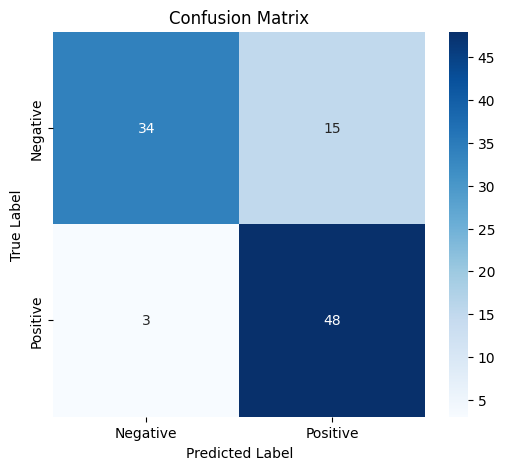

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()